# 567. Permutation in String

## Description:

Given two strings s1 and s2, return true if s2 contains a 
permutation
 of s1, or false otherwise.

In other words, return true if one of s1's permutations is the substring of s2.

## Examples:

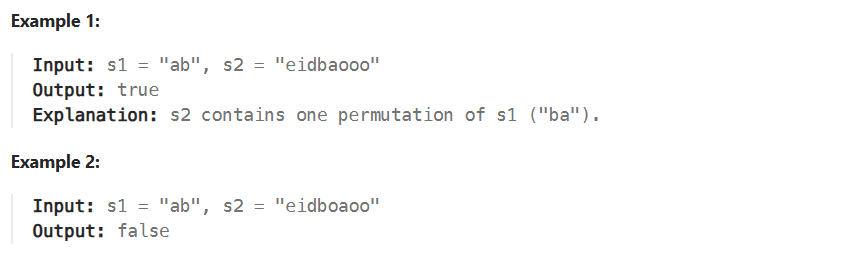

## Cons